# Rates analysis

### Load the data, add column names

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# Read CSV without using first row as headers
df = pd.read_csv('../output/sample_data_54.csv')
df.head()


,id,timestamp,insurance_type,postal_code,address,unit_apt,city,province,name,date_of_birth,...,has_sprinkler_system,occupants_non_smokers,num_fire_extinguishers,num_mortgages,email,phone,carrier_name,carrier_original_name,monthly_premium,annual_premium
0,4e5645d0-7d84-44ce-81d9-cb8e0f42609e,20250611_165330,H,M9C 4S5,29 Rhinestone Dr,NaN,Etobicoke,ON,Michael Tanner,1978-06-08,...,False,False,0,2,NaN,2897308160,max_insurance,Max Insurance,217.00,2604
1,4e5645d0-7d84-44ce-81d9-cb8e0f42609e,20250611_165330,H,M9C 4S5,29 Rhinestone Dr,NaN,Etobicoke,ON,Michael Tanner,1978-06-08,...,False,False,0,2,NaN,2897308160,sgi_canada,SGI Canada,259.58,3115
2,4e5645d0-7d84-44ce-81d9-cb8e0f42609e,20250611_165330,H,M9C 4S5,29 Rhinestone Dr,NaN,Etobicoke,ON,Michael Tanner,1978-06-08,...,False,False,0,2,NaN,2897308160,square_one,Square One Insurance Services,410.73,4929
3,b8dcb668-5294-4852-be05-cb7d2663568c,20250611_170819,H,M9B 1L3,78 Mervyn Ave,NaN,Etobicoke,ON,Leslie Hawkins,1995-01-13,...,True,True,0,2,NaN,8554654009,sgi_canada,SGI Canada,231.50,2778
4,b8dcb668-5294-4852-be05-cb7d2663568c,20250611_170819,H,M9B 1L3,78 Mervyn Ave,NaN,Etobicoke,ON,Leslie Hawkins,1995-01-13,...,True,True,0,2,NaN,8554654009,max_insurance,Max Insurance,243.67,2924


In [3]:
df.describe()

,unit_apt,move_in_year,occupants,num_claims,num_cancellations,num_fire_extinguishers,num_mortgages,email,phone,monthly_premium,annual_premium
count,89.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,0.0,1.900000e+02,190.000000,190.000000
mean,586.865169,2015.910526,2.026316,1.200000,0.873684,1.131579,1.110526,NaN,6.898028e+09,369.799421,4437.594737
std,259.217274,4.454045,0.812822,0.798146,0.800028,0.964202,0.886939,NaN,2.384341e+09,258.437449,3101.250154
min,4.000000,2009.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.897308e+09,76.040000,912.000000
25%,425.000000,2013.000000,1.000000,1.000000,0.000000,0.000000,0.000000,NaN,2.897308e+09,220.830000,2650.000000
50%,682.000000,2016.000000,2.000000,1.000000,1.000000,1.000000,1.000000,NaN,7.818398e+09,294.425000,3533.000000
75%,763.000000,2020.000000,3.000000,2.000000,2.000000,2.000000,2.000000,NaN,8.554654e+09,433.662500,5204.000000
max,897.000000,2024.000000,3.000000,2.000000,2.000000,3.000000,2.000000,NaN,8.554654e+09,1896.670000,22760.000000


In [4]:
df.isnull().sum()

id                               0
timestamp                        0
insurance_type                   0
postal_code                      0
address                          0
unit_apt                       101
city                             0
province                         0
name                             0
date_of_birth                    0
move_in_year                     0
occupants                        0
active_home_insurance            0
ever_insured                     0
num_claims                       0
num_cancellations                0
multiline_discount               0
has_monitored_fire_alarm         0
has_deadbolt_locks               0
has_monitored_burglar_alarm      0
has_sprinkler_system             0
occupants_non_smokers            0
num_fire_extinguishers           0
num_mortgages                    0
email                          190
phone                            0
carrier_name                     0
carrier_original_name            0
monthly_premium     

In [8]:
df.columns

Index(['id', 'timestamp', 'insurance_type', 'postal_code', 'address',
       'unit_apt', 'city', 'province', 'name', 'date_of_birth', 'move_in_year',
       'occupants', 'active_home_insurance', 'ever_insured', 'num_claims',
       'num_cancellations', 'multiline_discount', 'has_monitored_fire_alarm',
       'has_deadbolt_locks', 'has_monitored_burglar_alarm',
       'has_sprinkler_system', 'occupants_non_smokers',
       'num_fire_extinguishers', 'num_mortgages', 'email', 'phone',
       'carrier_name', 'carrier_original_name', 'monthly_premium',
       'annual_premium'],
      dtype='object')

## Exploratory analysis

In [5]:
# 1. Basic price statistics by carrier
print("Basic Statistics for Monthly Rates by Carrier:")
print(df.groupby('carrier_original_name')[['monthly_premium']].agg(['mean', 'min', 'max', 'std']).round(2))

Basic Statistics for Monthly Rates by Carrier:
                              monthly_premium                         
                                         mean     min      max     std
carrier_original_name                                                 
Economical Mutual                      363.09  162.00   772.17  143.53
Gore                                   439.77  163.75  1033.08  293.97
Max Insurance                          276.02  130.58   867.58  128.12
Pembridge                              706.50  335.42  1896.67  350.76
SGI Canada                             325.23  137.42  1564.08  253.86
Square One Insurance Services          259.72   76.04   675.53  134.20
Travelers Insurance                    343.37  205.42   560.42  120.34


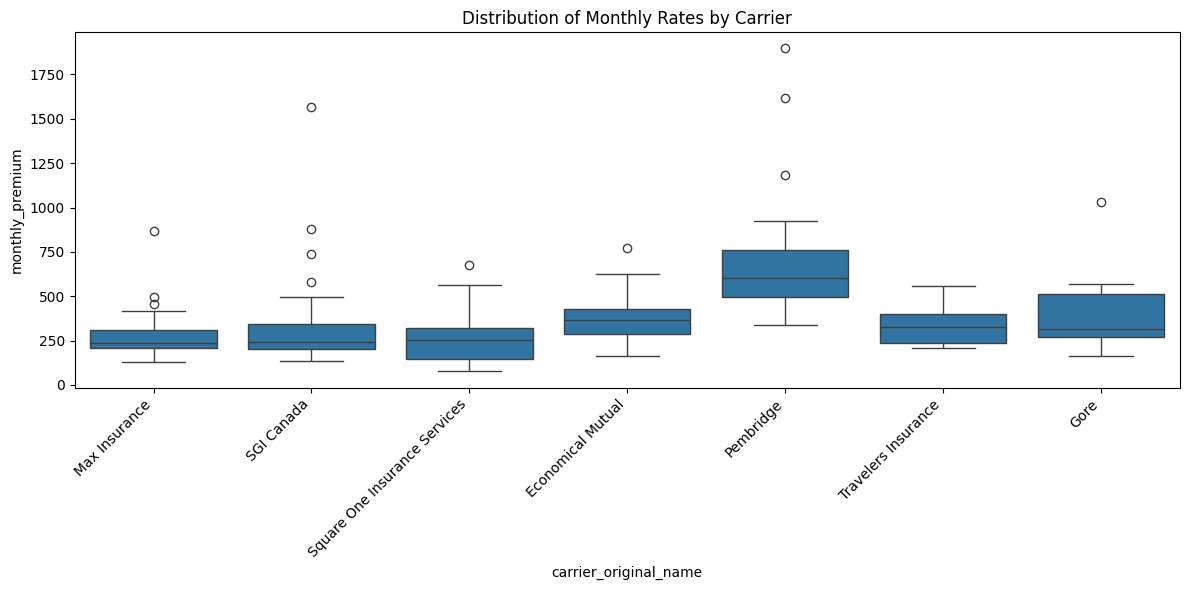


Price Variability (CV%) by Carrier:
carrier_original_name
SGI Canada                       78.06
Gore                             66.85
Square One Insurance Services    51.67
Pembridge                        49.65
Max Insurance                    46.42
Economical Mutual                39.53
Travelers Insurance              35.05
Name: monthly_premium, dtype: float64


In [11]:


# Visualize distribution of monthly rates by carrier
plt.figure(figsize=(12, 6))
sns.boxplot(x='carrier_original_name', y='monthly_premium', data=df)
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Monthly Rates by Carrier')
plt.tight_layout()
plt.show()

# Calculate the coefficient of variation (CV) to compare price variability
cv = df.groupby('carrier_original_name')['monthly_premium'].agg(lambda x: x.std() / x.mean() * 100).round(2)
print("\nPrice Variability (CV%) by Carrier:")
print(cv.sort_values(ascending=False))


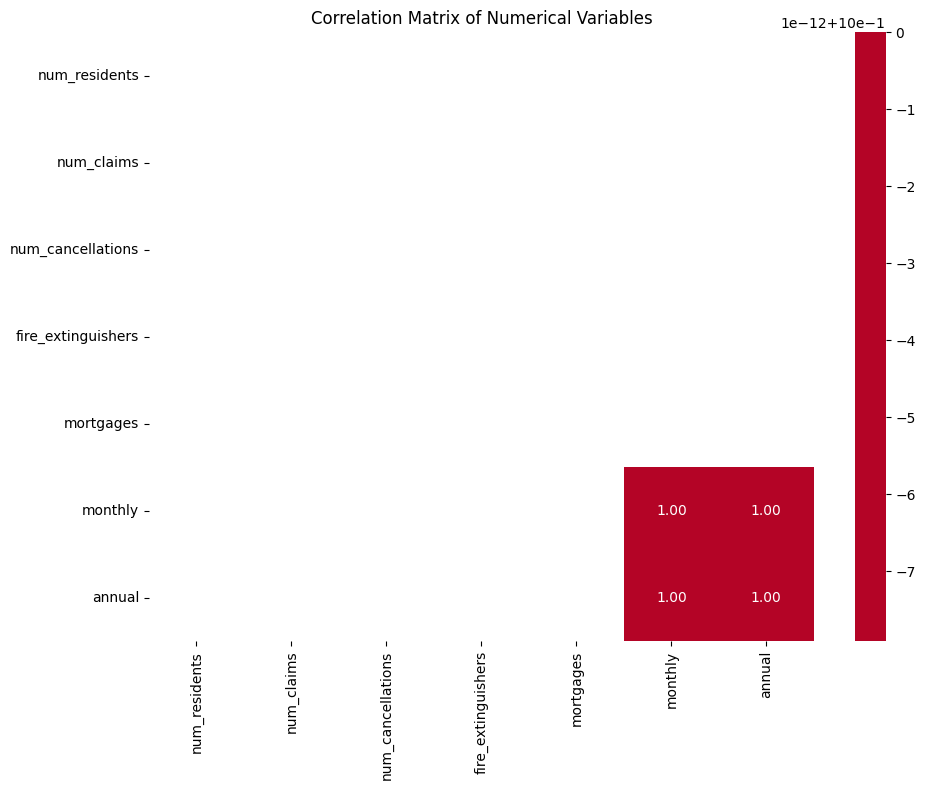


Strongest correlations with monthly rates:
monthly               1.0
annual                1.0
num_residents         NaN
num_claims            NaN
num_cancellations     NaN
fire_extinguishers    NaN
mortgages             NaN
Name: monthly, dtype: float64


In [6]:
# 2. Correlation analysis for numerical variables
numerical_cols = ['num_residents', 'num_claims', 'num_cancellations', 
                 'fire_extinguishers', 'mortgages', 'monthly', 'annual']

# Create correlation matrix
corr_matrix = df[numerical_cols].corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix of Numerical Variables')
plt.tight_layout()
plt.show()

# Print strongest correlations with monthly rates
correlations = corr_matrix['monthly'].sort_values(ascending=False)
print("\nStrongest correlations with monthly rates:")
print(correlations)

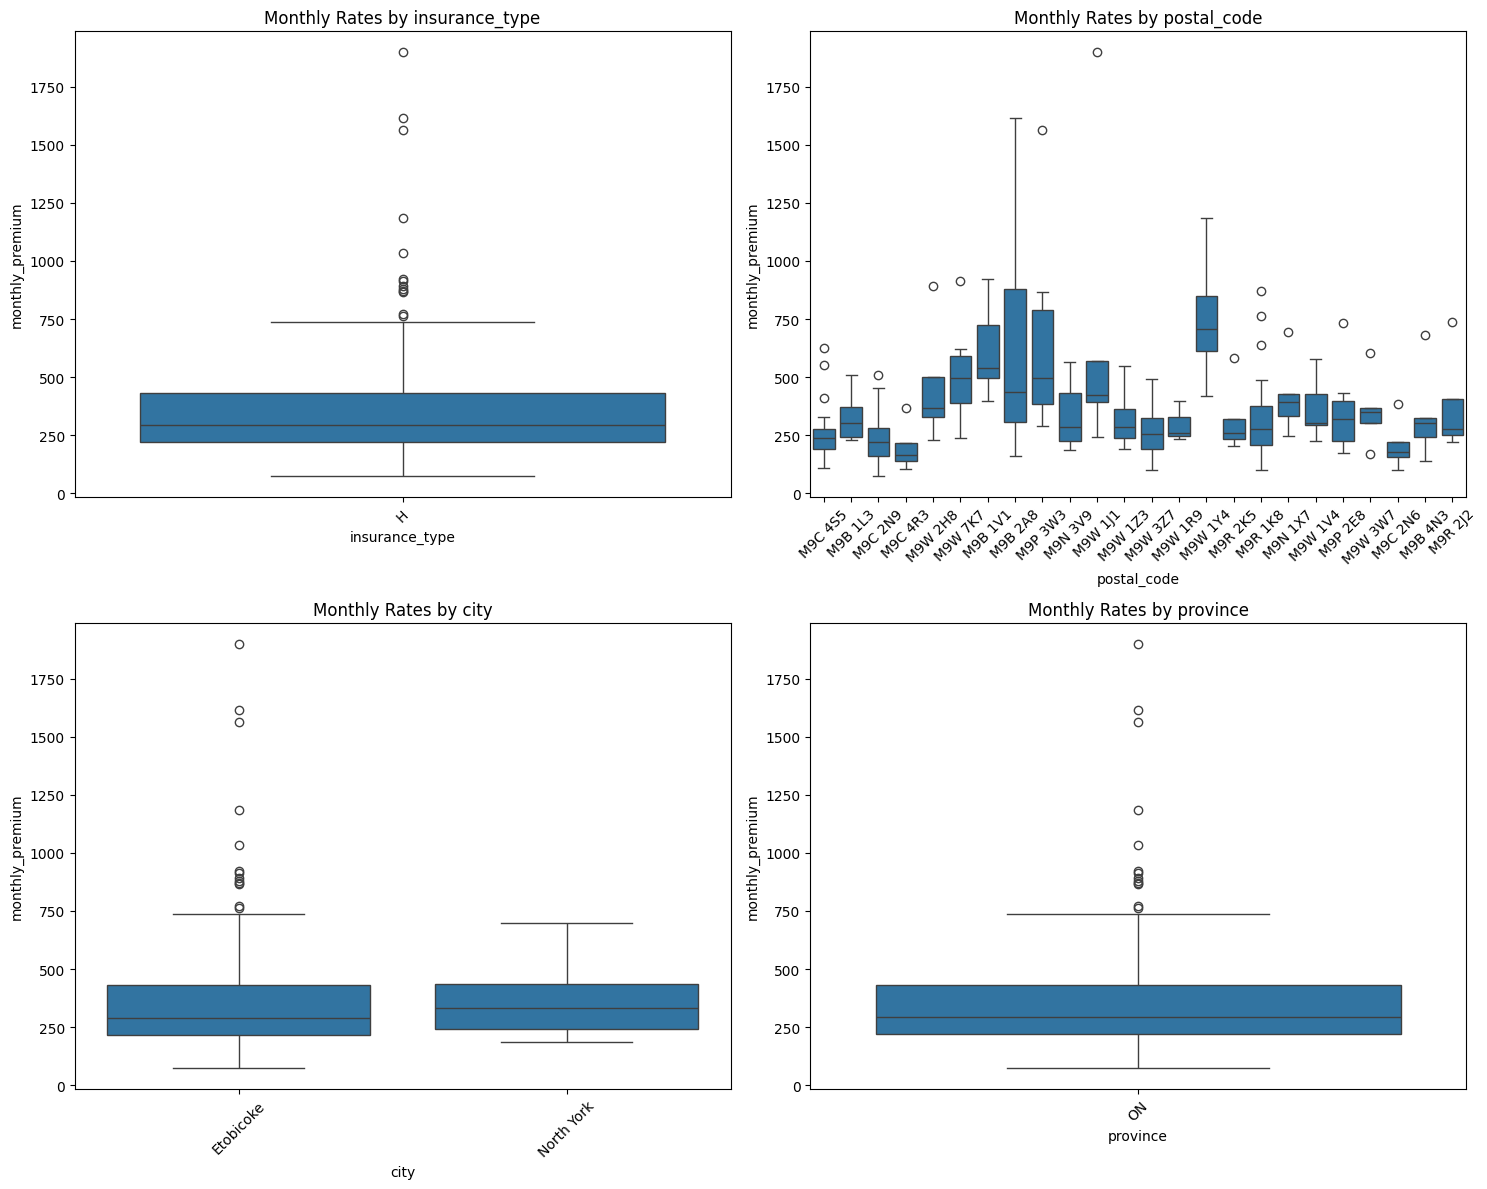


Average monthly rates by categorical variables:

insurance_type:
                 mean  count
insurance_type              
H               369.8    190

postal_code:
               mean  count
postal_code               
M9B 1L3      332.08      5
M9B 1V1      611.26      6
M9B 2A8      604.91      9
M9B 4N3      337.12      5
M9C 2N6      208.14      5
M9C 2N9      236.14     27
M9C 4R3      198.13      5
M9C 4S5      274.16     17
M9N 1X7      419.84      5
M9N 3V9      329.92     10
M9P 2E8      349.80      8
M9P 3W3      680.16      6
M9R 1K8      332.64     28
M9R 2J2      379.50      4
M9R 2K5      320.17      5
M9W 1J1      705.60      5
M9W 1R9      297.13      3
M9W 1V4      366.24      5
M9W 1Y4      754.03      4
M9W 1Z3      325.05      5
M9W 2H8      463.14      4
M9W 3W7      358.33      5
M9W 3Z7      268.06      7
M9W 7K7      516.19      7

city:
              mean  count
city                     
Etobicoke   370.65    175
North York  359.89     15

province:
         

In [12]:
# 3. Analysis of categorical variables
categorical_vars = ['insurance_type', 'postal_code', 'city', 'province']

# Create subplots for each categorical variable
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

for idx, var in enumerate(categorical_vars[:4]):  # Show first 4 for space
    sns.boxplot(x=var, y='monthly_premium', data=df, ax=axes[idx])
    axes[idx].set_title(f'Monthly Rates by {var}')
    axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Calculate average rates for each categorical variable
print("\nAverage monthly rates by categorical variables:")
for var in categorical_vars:
    print(f"\n{var}:")
    print(df.groupby(var)['monthly_premium'].agg(['mean', 'count']).round(2))



Analysis for Square One Insurance Services
--------------------------------------------------

Basic Statistics:
count      2.00
mean     315.16
std        0.00
min      315.16
25%      315.16
50%      315.16
75%      315.16
max      315.16
Name: monthly, dtype: float64

Top correlations with monthly rates:
num_residents        NaN
num_claims           NaN
num_cancellations    NaN
fire_extinguishers   NaN
mortgages            NaN
monthly              NaN
Name: monthly, dtype: float64


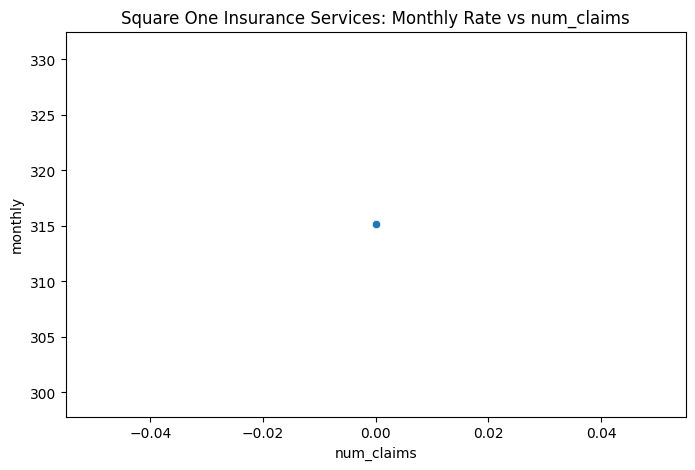


Analysis for Gore
--------------------------------------------------

Basic Statistics:
count       2.00
mean     1239.92
std         0.00
min      1239.92
25%      1239.92
50%      1239.92
75%      1239.92
max      1239.92
Name: monthly, dtype: float64

Top correlations with monthly rates:
num_residents        NaN
num_claims           NaN
num_cancellations    NaN
fire_extinguishers   NaN
mortgages            NaN
monthly              NaN
Name: monthly, dtype: float64


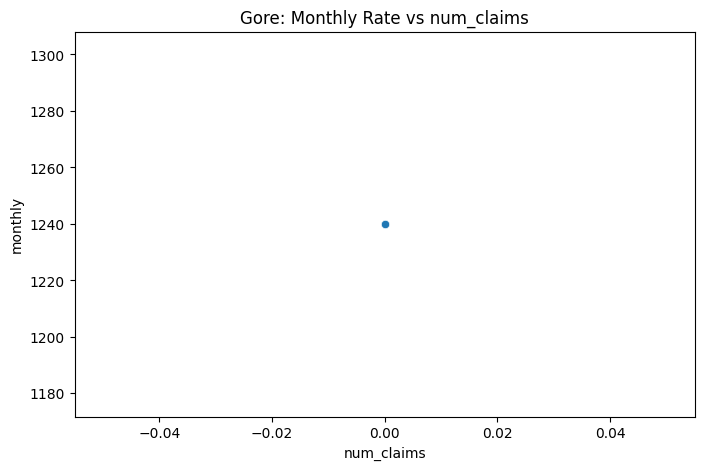


Analysis for Pembridge
--------------------------------------------------

Basic Statistics:
count       2.00
mean     1496.75
std         0.00
min      1496.75
25%      1496.75
50%      1496.75
75%      1496.75
max      1496.75
Name: monthly, dtype: float64

Top correlations with monthly rates:
num_residents        NaN
num_claims           NaN
num_cancellations    NaN
fire_extinguishers   NaN
mortgages            NaN
monthly              NaN
Name: monthly, dtype: float64


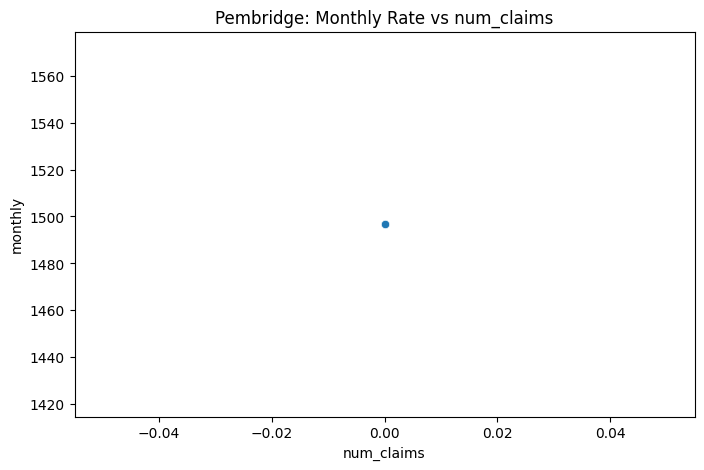


Analysis for Economical Mutual
--------------------------------------------------

Basic Statistics:
count       2.0
mean     2303.5
std         0.0
min      2303.5
25%      2303.5
50%      2303.5
75%      2303.5
max      2303.5
Name: monthly, dtype: float64

Top correlations with monthly rates:
num_residents        NaN
num_claims           NaN
num_cancellations    NaN
fire_extinguishers   NaN
mortgages            NaN
monthly              NaN
Name: monthly, dtype: float64


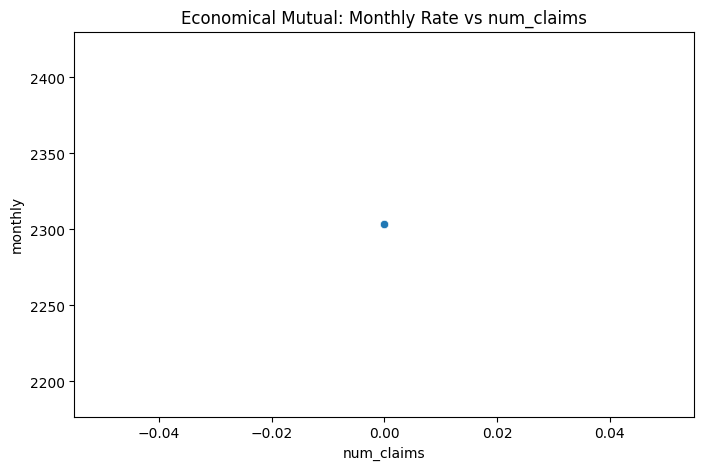

In [9]:
# 4. Carrier-specific analysis
# Create a function to analyze rates for a specific carrier
def analyze_carrier(carrier_name):
    carrier_data = df[df['carrier'] == carrier_name]
    
    print(f"\nAnalysis for {carrier_name}")
    print("-" * 50)
    
    # Basic statistics
    print("\nBasic Statistics:")
    print(carrier_data['monthly'].describe().round(2))
    
    # Top correlations
    numerical_cols = ['num_residents', 'num_claims', 'num_cancellations', 
                     'fire_extinguishers', 'mortgages', 'monthly']
    correlations = carrier_data[numerical_cols].corr()['monthly'].sort_values(ascending=False)
    print("\nTop correlations with monthly rates:")
    print(correlations.round(3))
    
    # Plot relationship with top numerical variable
    top_num_var = correlations.index[1]  # Skip monthly itself
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=carrier_data, x=top_num_var, y='monthly')
    plt.title(f'{carrier_name}: Monthly Rate vs {top_num_var}')
    plt.show()

# Analyze each carrier
for carrier in df['carrier'].unique():
    analyze_carrier(carrier)
